In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
import re

In [2]:
def make_ini_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt',skiprows=2, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    y=(xl[t_vl==t] * 512)
    x=((1-yl[t_vl==t]) * 512)
    rl=rl[t_vl==t]

    positions = list(zip(x, y))  # Convert x, y arrays to a list of (x, y) coordinate tuples
    image_tensor = ind2CNet(positions,rl)  # Pass the positions list to the ind2CNet function

    #image_tensor = cv2.rotate(image_tensor, cv2.ROTATE_90_COUNTERCLOCKWISE)
   

 
    save_dir='/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/id/'
    
    output_path = save_dir+str(t)+'.jpg'
    #output_path_Y_c = save_dir+'source/'+str(start_ind+i)+'contr.png'

    cv2.imwrite(output_path, image_tensor)
    image_rgb = cv2.cvtColor(image_tensor, cv2.COLOR_GRAY2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    
    
def make_id_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt',skiprows=2, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    x=(xl[t_vl==t] * 512)
    y=(yl[t_vl==t] * 512)
    ide=idel[t_vl==t]

    positions = list(zip(x, y))  # Convert x, y arrays to a list of (x, y) coordinate tuples
    image_tensor = ind2id(positions,idel,ide)  # Pass the positions list to the ind2CNet function

    image_tensor = cv2.rotate(image_tensor, cv2.ROTATE_90_COUNTERCLOCKWISE)
   

 
    save_dir='/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/id/'
    
    output_path = save_dir+str(t)+'.jpg'
    #output_path_Y_c = save_dir+'source/'+str(start_ind+i)+'contr.png'

    cv2.imwrite(output_path, image_tensor)
    image_rgb = cv2.cvtColor(image_tensor, cv2.COLOR_GRAY2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    
    
    
def make_circ_pic(path_GT, t): 
    xl,yl,rl,idel,split_l,s_pr_l,t_vl= np.loadtxt('./'+path_GT+'/pos_GT.txt',skiprows=1, delimiter='\t', usecols=(0,1,2,3,4,5,6), unpack=True)
    x=(xl[t_vl==t] * 512)
    y=(yl[t_vl==t] * 512)
    rl=rl[t_vl==t]

    positions = list(zip(x, y))  # Convert x, y arrays to a list of (x, y) coordinate tuples
    image_tensor = ind2circ(positions,rl)  # Pass the positions list to the ind2CNet function

    image_tensor = cv2.rotate(image_tensor, cv2.ROTATE_90_COUNTERCLOCKWISE)
   

 
    save_dir='/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/'
    
    output_path = save_dir+'/circ/'+str(t)+'.jpg'
    #output_path_Y_c = save_dir+'source/'+str(start_ind+i)+'contr.png'

    cv2.imwrite(output_path, image_tensor)
    #image_rgb = cv2.cvtColor(image_tensor, cv2.COLOR_GRAY2RGB)
    #plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


def ind2CNet(ind_list,values):

    image_tensor =  np.zeros((512, 512),dtype=np.uint8)

    # Define the radius of the ball
    #radius = 5

    # Define the color of the ball (white)
    #color = (255, 255, 255)

    # Define the list of positions
    #positions = ind_list
    #print('ind',ind_list)



    for position, value in zip(ind_list, values):
        x, y = int(position[0]), int(position[1])
        radius = int(map_value_linear(value, 0.003, 0.045, 2, 8))
        print(value,radius)

        # Draw a circle with the given radius and color
        for i in range(-radius, radius+1):
            for j in range(-radius, radius+1):
                if i**2 + j**2 <= radius**2:
                    try:
                        image_tensor[x+i, y+j] = 255
                    except IndexError:
                        pass

    return image_tensor

def sort_key(file_name):
    # Extract the number from the file name
    number = re.findall(r'\d+', file_name)
    if number:
        return int(number[0])
    else:
        return 0

def ind2circ(ind_list,values):
    # Define the image tensor with 3 channels (RGB)
    image_tensor =  np.ones((512, 512, 3), dtype=np.uint8)*255

    # Define the radius of the circle
    #radius = 15

    # Define the color of the circle (red)
    color = (0, 0, 255)

    # Define the list of positions
    #positions = ind_list
    
    for position, value in zip(ind_list, values):
        x, y = int(position[0]), int(position[1])
        radius = int(value *(15/0.035))
        
         # Draw a circle with the given radius and color
        for i in range(-radius, radius+1):
            for j in range(-radius, radius+1):
                if (i**2 + j**2) >= (radius-1)**2 and (i**2 + j**2) <= (radius+1)**2:
                    try:
                        image_tensor[x+i, y+j] = color
                    except IndexError:
                        pass
    return image_tensor


def ind2id(ind_list,idel,ide):
    
    max_id = np.max(idel)
    
    c_list = np.linspace(100,255,int(max_id))

    image_tensor =  np.zeros((512, 512),dtype=np.uint8)

    # Define the radius of the ball
    radius = 5

    # Define the color of the ball (white)
    #color = (255, 255, 255)

    # Define the list of positions
    positions = ind_list
    #print('ind',ind_list)


    k=0
    # Loop over the positions and draw a circle around each one
    for position in positions:
        # Convert the position to integer coordinates
        #try:
        x, y = int(position[0]), int(position[1])
        
        print('**',x,y,ide[k],c_list[int(ide[k]-1)])

        # Draw a circle with the given radius and color
        for i in range(-radius, radius+1):
            for j in range(-radius, radius+1):
                if i**2 + j**2 <= radius**2:
                    try:
                        image_tensor[x+i, y+j] = c_list[int(ide[k]-1)]
                    except IndexError:
                        pass#print('IndErr',i,j)
                    
        k=k+1
        #except: 
           # pass


    return image_tensor


def combine_images(image_folder, circle_folder):
    # Sort file lists
    image_files = sorted(os.listdir(image_folder),key=sort_key)
    print('image_files',image_files)
    circle_files = sorted(os.listdir(circle_folder),key=sort_key)
    print('circ_files',circle_files)

    for img_file, circle_file in zip(image_files, circle_files):
        # Open the base image and the circle image
        image = Image.open(os.path.join(image_folder, img_file))
        circle_image = Image.open(os.path.join(circle_folder, circle_file))
        
        circle_image = circle_image.convert("RGBA")
        datas = circle_image.getdata()

        new_data = []
        for item in datas:
            # change all white (also shades of whites)
            # pixels to transparent
            if item[1] > 40 and item[2] > 40:
                new_data.append((item[0], item[1], item[2], 0))
            else:
                new_data.append(item)
                
        circle_image.putdata(new_data)

        # Scale the circle image
        circle_image = circle_image.resize((512, 512), Image.ANTIALIAS)

        # Copy the circle layer onto the base image
        image.paste(circle_image, (0,0), circle_image)

        # Save the resulting image
        image.save(os.path.join(image_folder, "combined_" + img_file))

        
        
def map_value_linear(value, in_min, in_max, out_min, out_max):
    # Ensure the input value is within the input range
    value = max(min(value, in_max), in_min)
    
    if value==in_min:
        return 1
    elif value== in_max:
        return 8

    # Map the value to the output range using linear interpolation
    return int((value - in_min) * (out_max - out_min) / (in_max - in_min) + out_min)


0.035 6
0.036333333333333336 6
0.034 6
0.03766666666666666 6
0.038000000000000006 7


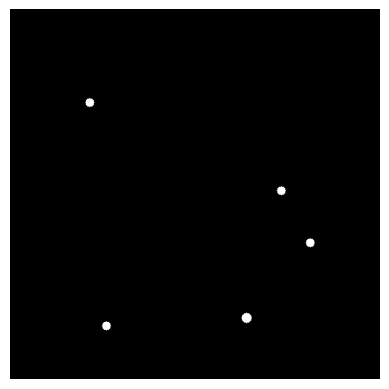

0.038043333333333325 7
0.03434 6
0.038000000000000006 7
0.035350000000000006 6
0.036333333333333336 6


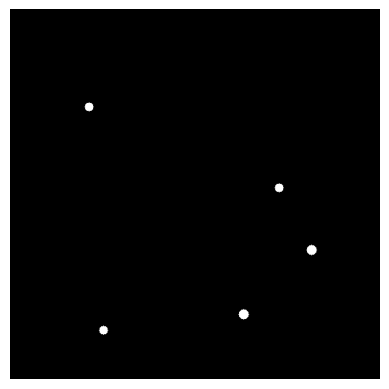

0.038043333333333325 7
0.03669666666666667 6
0.038000000000000006 7
0.03434 6
0.035350000000000006 6


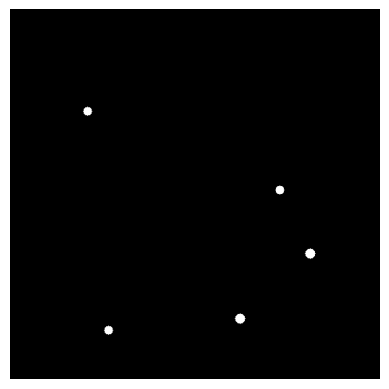

0.020177965318434504 4
0.03842376666666666 7
0.03669666666666667 6
0.035703500000000006 6
0.038380000000000004 7


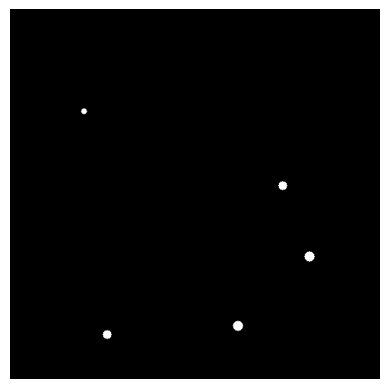

0.036060535000000005 6
0.020177965318434504 4
0.03706363333333334 6
0.038380000000000004 7
0.03842376666666666 7


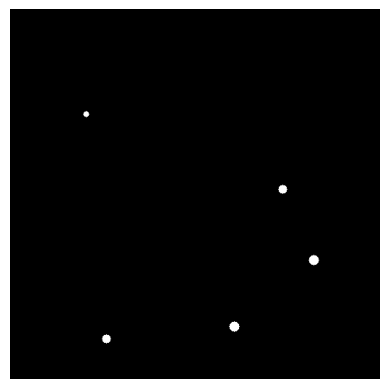

0.03743426966666667 6
0.036060535000000005 6
0.008708619512531763 2
0.038808004333333326 7
0.03876380000000001 7


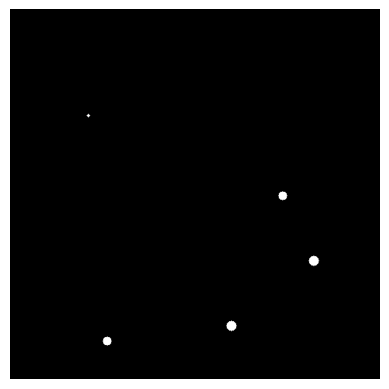

0.008708619512531763 2
0.03915143800000001 7
0.036060535000000005 6
0.03919608437666666 7
0.03780861236333334 6


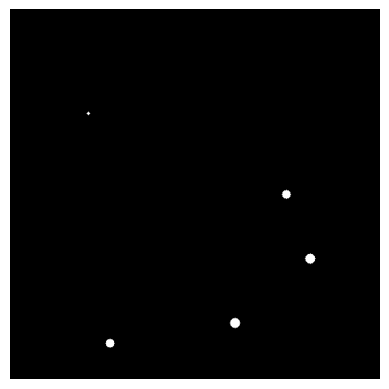

0.03954295238000001 7
0.03780861236333334 6
0.036421140350000006 6
0.008708619512531763 2
0.03919608437666666 7


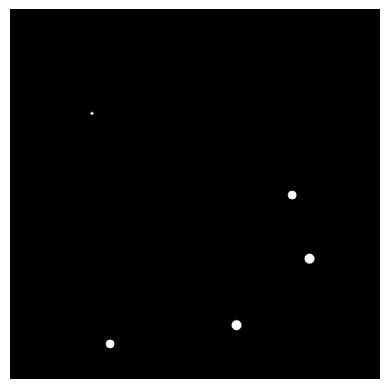

0.03780861236333334 6
0.03958804522043333 7
0.036785351753500006 6
0.008708619512531763 2
0.03993838190380001 7


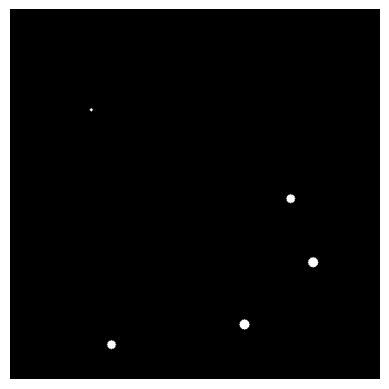

0.00505283591686076 2
0.021043581994039884 4
0.00397008536324774 2
0.03998392567263766 7
0.03780861236333334 6
0.03993838190380001 7


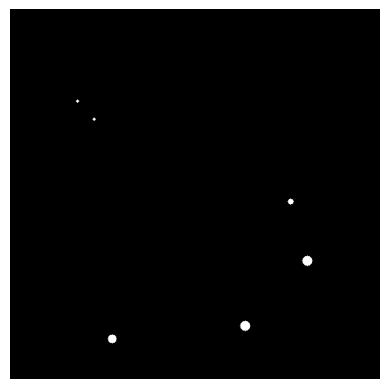

0.006153632313033997 2
0.021043581994039884 4
0.03998392567263766 7
0.007427668797785318 2
0.03993838190380001 7
0.03780861236333334 6


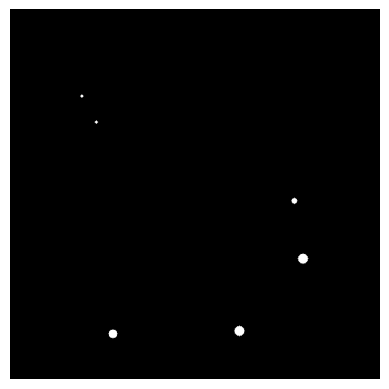

0.009230448469550996 2
0.03993838190380001 7
0.03818669848696667 7
0.009103077971210773 2
0.011067226508700123 3
0.03998392567263766 7


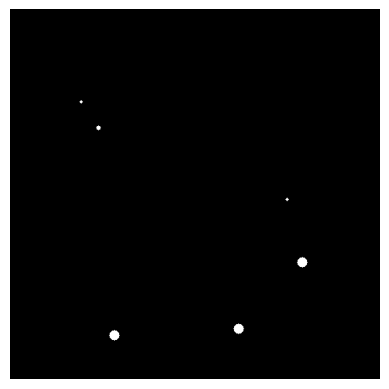

0.04033776572283801 7
0.04038376492936403 7
0.01626882296778918 3
0.009103077971210773 2
0.014214890643108534 3
0.03856856547183634 7


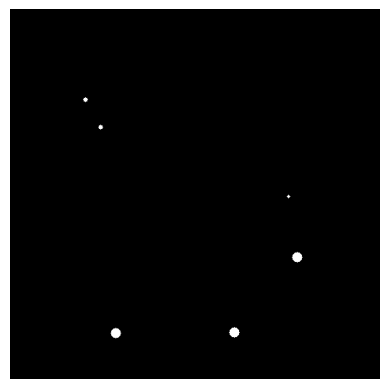

0.04074114338006639 7
0.009103077971210773 2
0.040787602578657677 7
0.023915169762650096 4
0.038954251126554706 7
0.02160663377752497 4


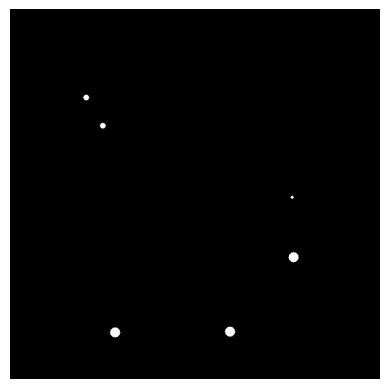

0.04074114338006639 7
0.03515529955109564 6
0.040787602578657677 7
0.03219388432851221 6
0.03934379363782026 7
0.009103077971210773 2


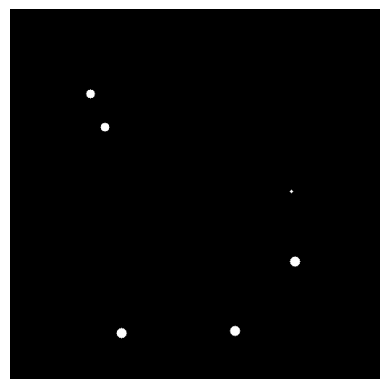

0.03515529955109564 6
0.041148554813867054 7
0.0026267316126621734 1
0.03251582317179733 6
0.03973723157419846 7
0.004127721105611989 2
0.04119547860444425 7


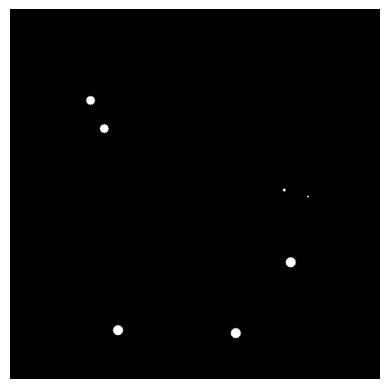

0.03251582317179733 6
0.041148554813867054 7
0.03973723157419846 7
0.0355068525466066 6
0.006232858869474103 2
0.041607433390488696 7
0.003861295470613395 2


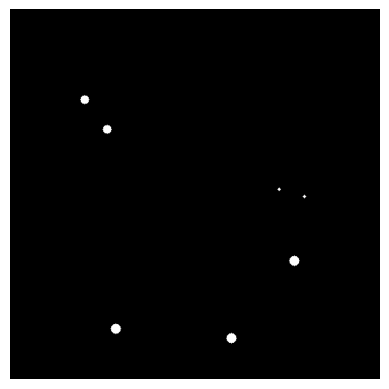

0.04202350772439358 7
0.035861921072072665 6
0.005676104341801691 2
0.009536274070295378 2
0.041560040362005723 7
0.03973723157419846 7
0.03251582317179733 6


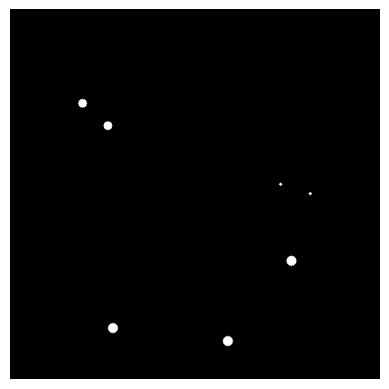

0.04244374280163752 7
0.014590499327551928 3
0.036220540282793395 6
0.04197564076562578 7
0.03973723157419846 7
0.008684439642956588 2
0.0328409814035153 6


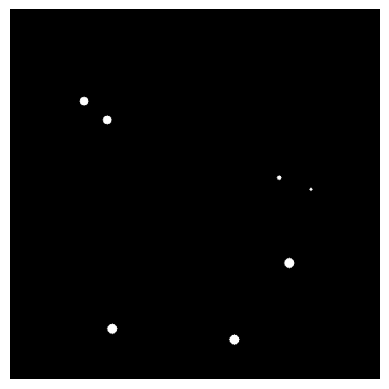

0.0328409814035153 6
0.04244374280163752 7
0.040134603889940446 7
0.01285297067157575 3
0.042395397173282036 7
0.021593939004776852 4
0.03658274568562133 6


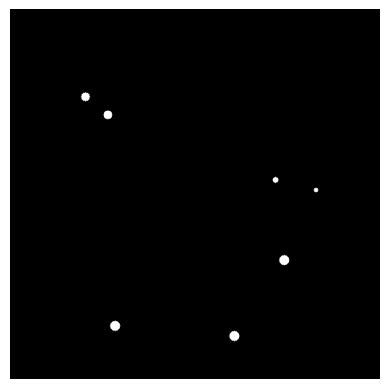

0.03658274568562133 6
0.03282278728726082 6
0.033169391217550456 6
0.042395397173282036 7
0.019279456007363624 4
0.040134603889940446 7
0.0428681802296539 7


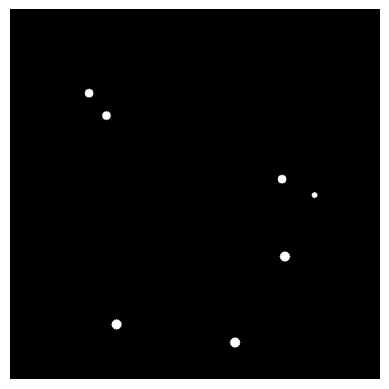

0.033169391217550456 6
0.03694857314247754 6
0.033151015160133426 6
0.042395397173282036 7
0.04053594992883985 7
0.027955211210677254 5
0.0428681802296539 7


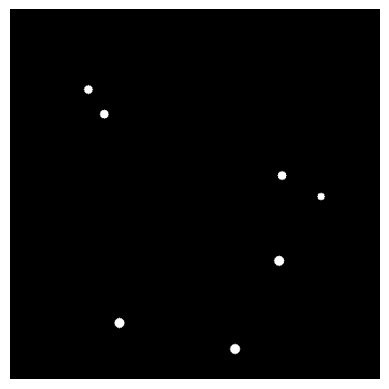

0.042395397173282036 7
0.03731805887390232 6
0.0427714731523362 7
0.04094130942812824 7
0.04329686203195044 7
0.03350108512972596 6
0.033151015160133426 6


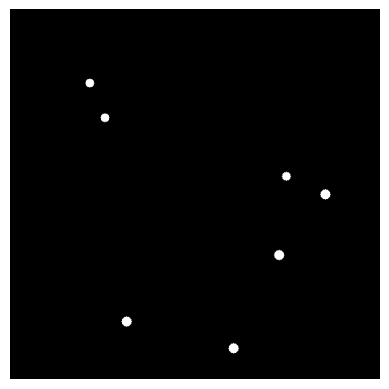

0.043729830652269944 7
0.03731805887390232 6
0.04281935114501486 7
0.04319918788385956 7
0.033151015160133426 6
0.03383609598102322 6
0.04094130942812824 7


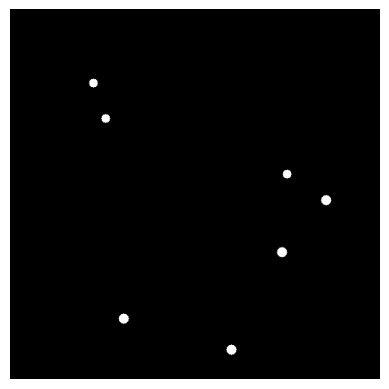

0.033151015160133426 6
0.043729830652269944 7
0.03731805887390232 6
0.03383609598102322 6
0.04094130942812824 7
0.04319918788385956 7
0.043247544656465006 7


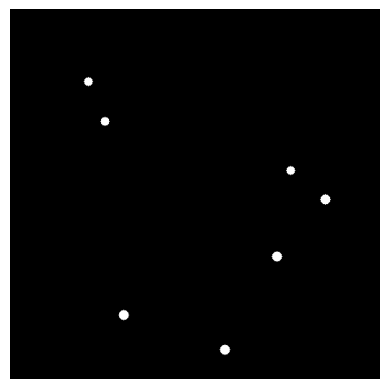

0.03383609598102322 6
0.041350722522409525 7
0.03348252531173476 6
0.04363117976269816 7
0.04416712895879264 7
0.043680020103029654 7
0.03769123946264134 6


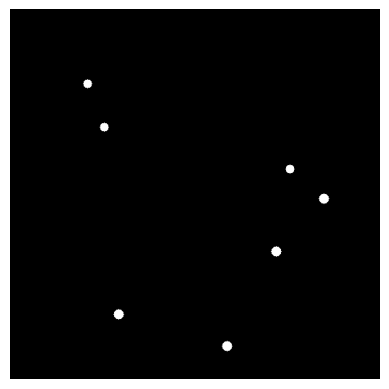

0.03348252531173476 6
0.03383609598102322 6
0.04416712895879264 7
0.03806815185726776 7
0.04176422974763362 7
0.04363117976269816 7
0.04411682030405995 7


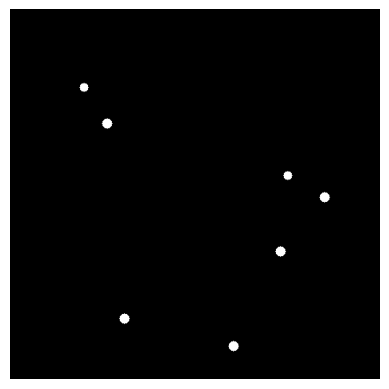

0.03417445694083345 6
0.04363117976269816 7
0.04411682030405995 7
0.03806815185726776 7
0.04460880024838057 7
0.04218187204510996 7
0.03348252531173476 6


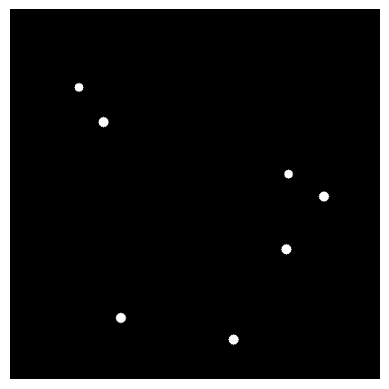

0.03451620151024179 6
0.03844883337584044 7
0.04455798850710055 7
0.04363117976269816 7
0.04260369076556106 7
0.03348252531173476 6
0.04460880024838057 7


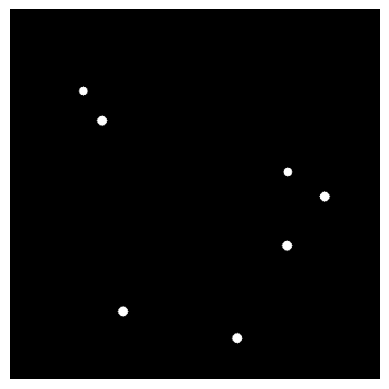

0.034861363525344205 6
0.04505488825086438 8
0.04260369076556106 7
0.04500356839217155 8
0.03844883337584044 7
0.03381735056485211 6
0.04363117976269816 7


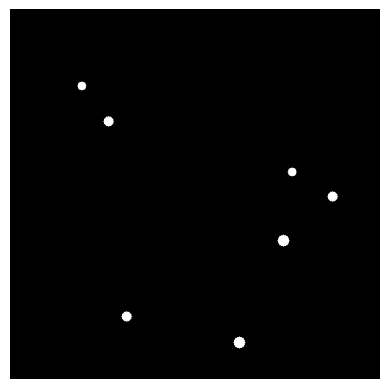

0.04545360407609327 8
0.03415552407050063 6
0.03520997716059765 6
0.045505437133373024 8
0.04363117976269816 7
0.04260369076556106 7
0.03844883337584044 7


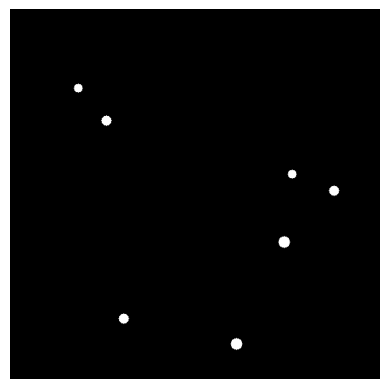

In [10]:
path_GT='1_GT'

for z in range(31):
    make_ini_pic(path_GT, t=z)

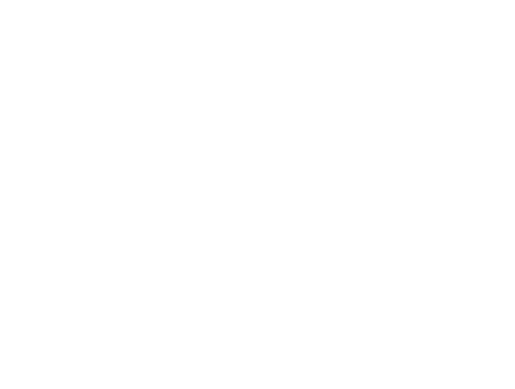

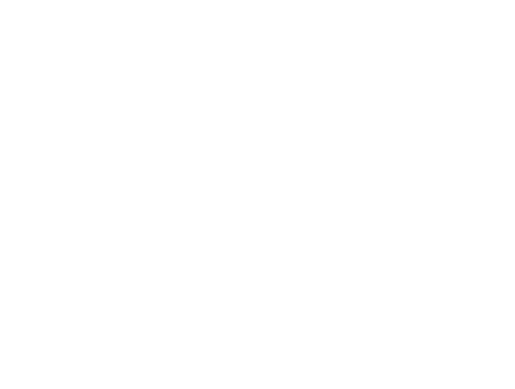

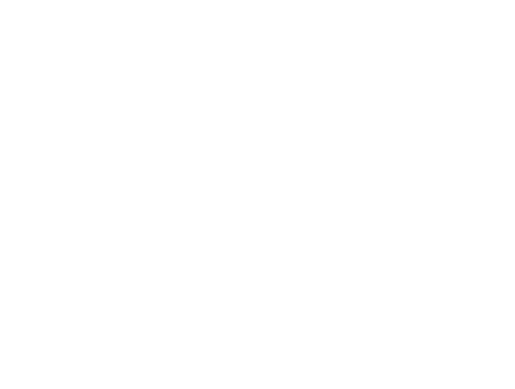

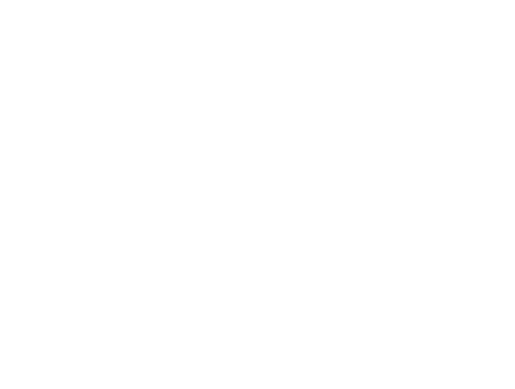

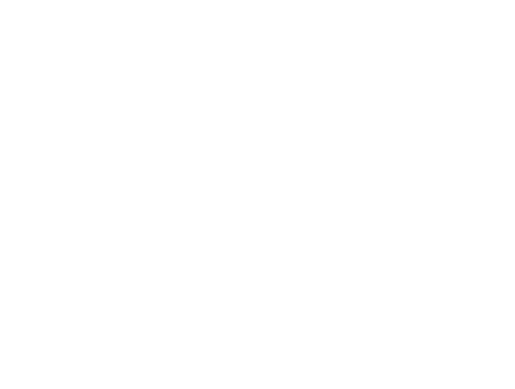

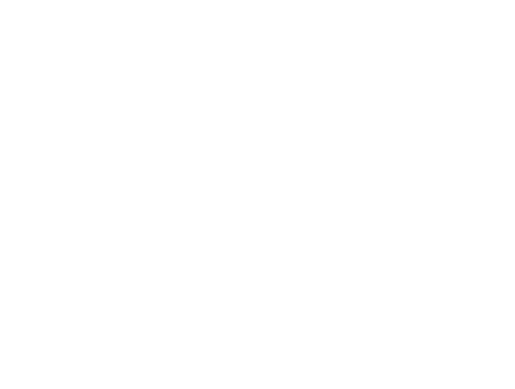

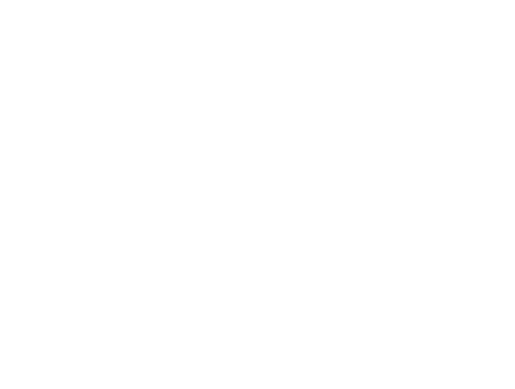

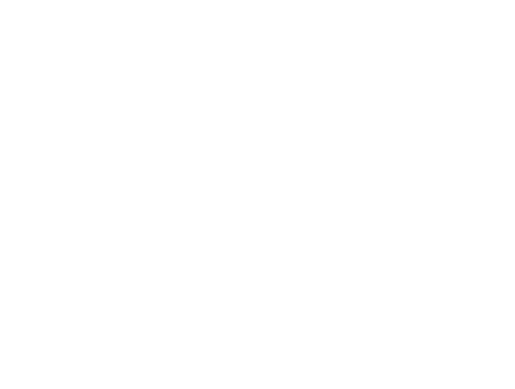

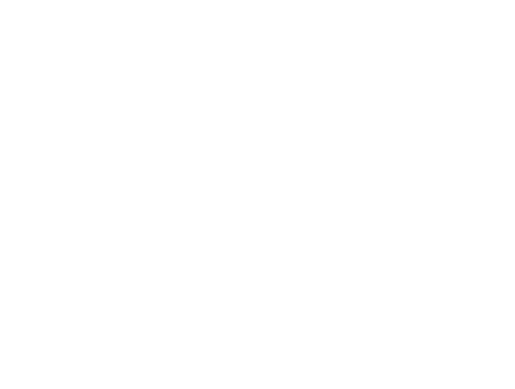

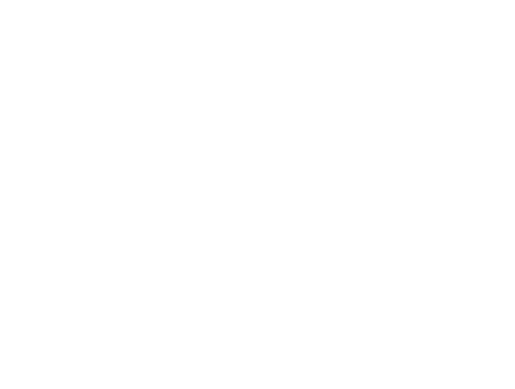

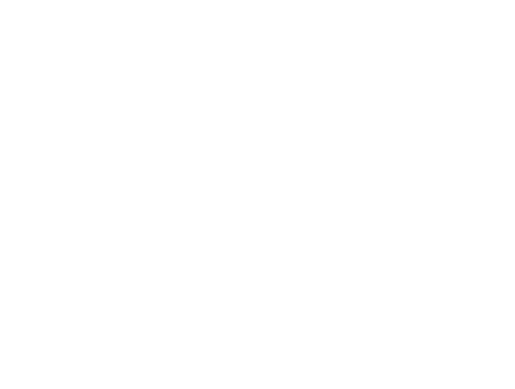

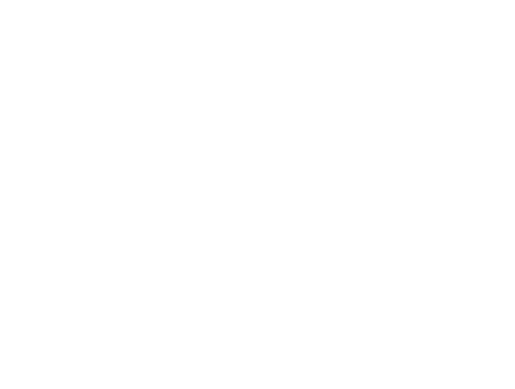

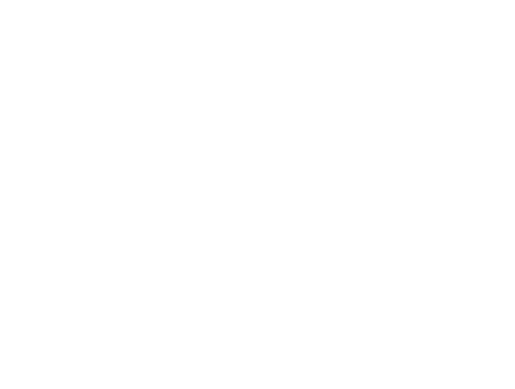

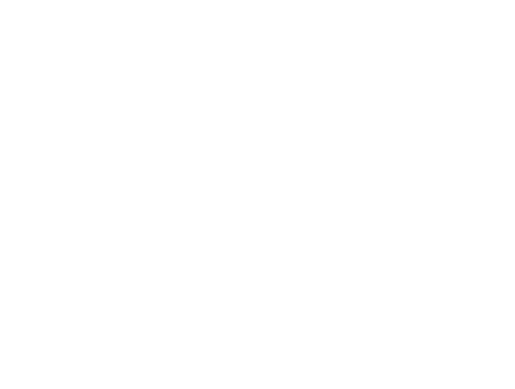

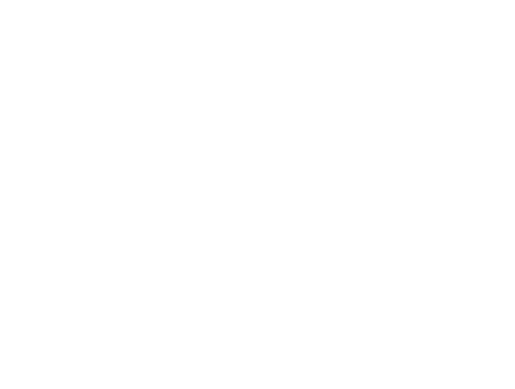

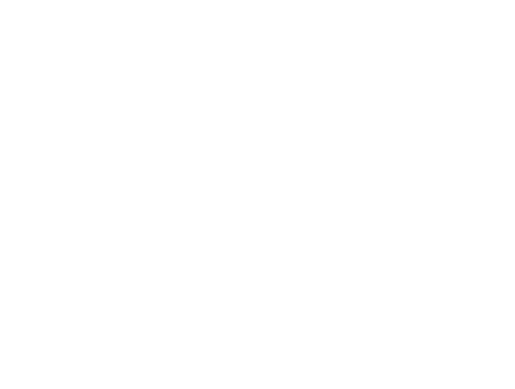

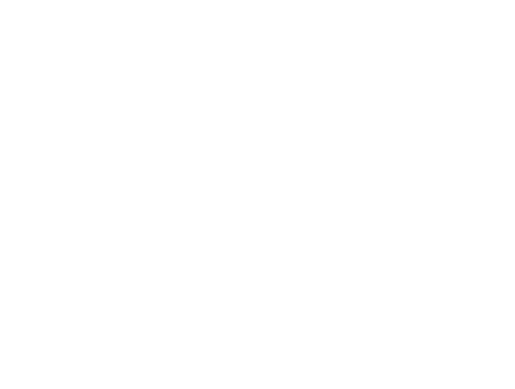

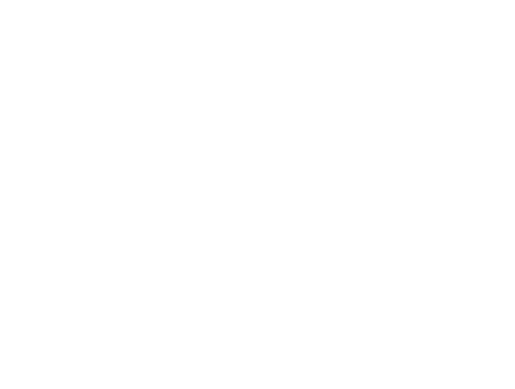

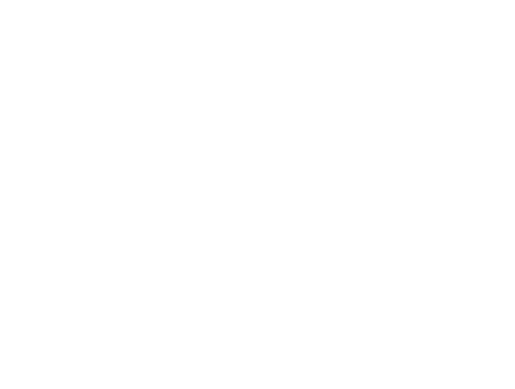

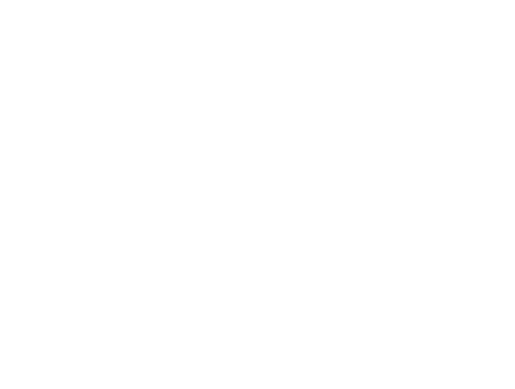

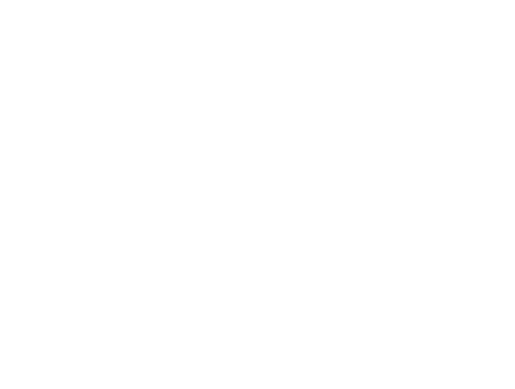

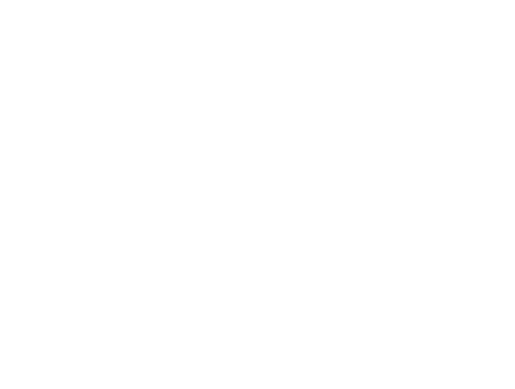

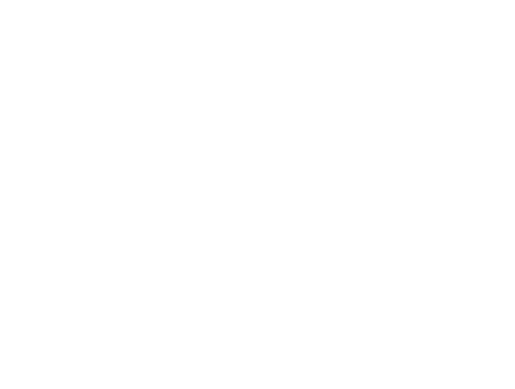

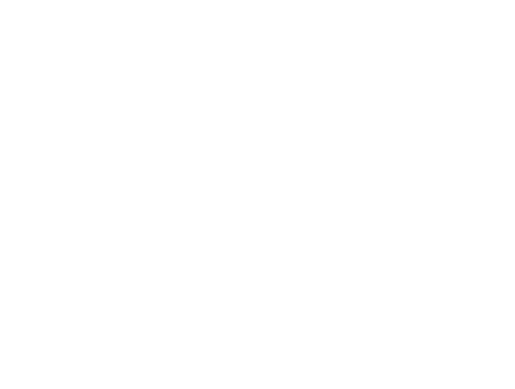

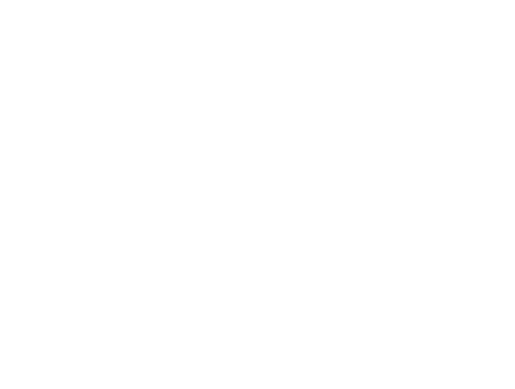

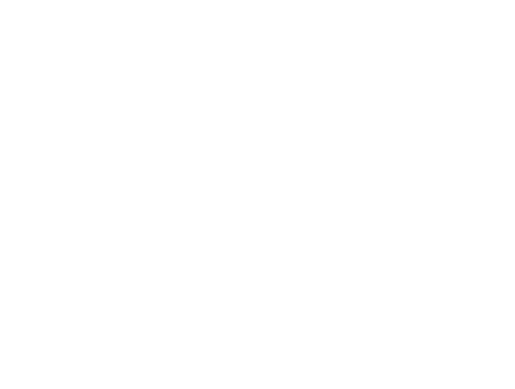

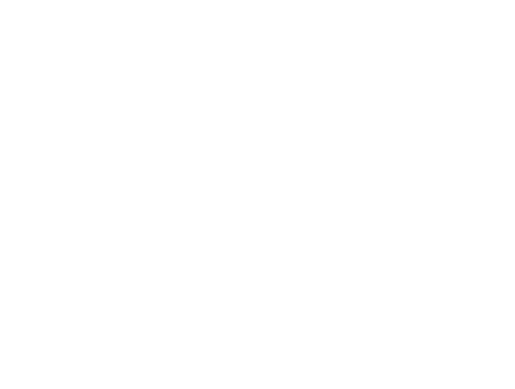

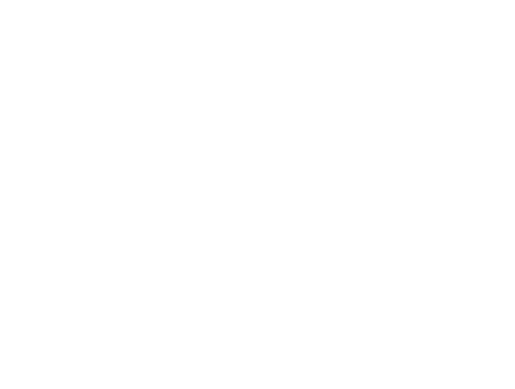

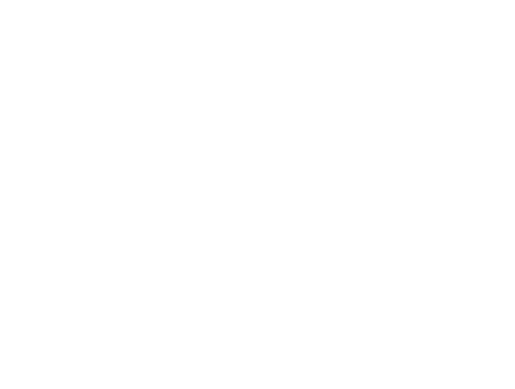

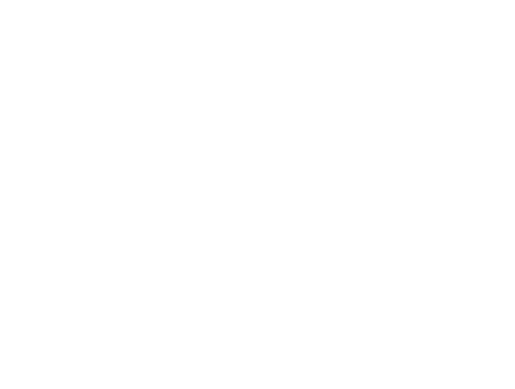

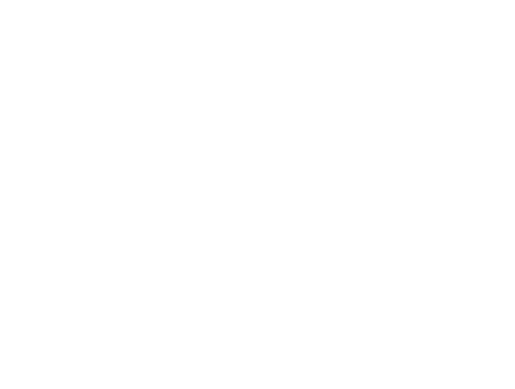

In [11]:
path_GT='1_GT'

for z in range(31):
    make_circ_pic(path_GT, t=z)

In [12]:
combine_images('/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/res_track', '/home/mo/Desktop/IWR/Cell_GT_Proj/dots2CNet/circ')

image_files ['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png']
circ_files ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg']


/tmp/ipykernel_108548/2787333861.py:217: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  circle_image = circle_image.resize((512, 512), Image.ANTIALIAS)


In [6]:
#path_GT='2_GT'

#for z in range(31):
#    make_id_pic(path_GT, t=z)